In [1]:
import sys
import os
from pathlib import Path
sys.path.append(
    os.path.dirname(os.path.abspath('.'))
)
from src import QNet, agent_metrics, show_reward, settings
### path load

import japanize_matplotlib
import numpy as np
import torch
from torchvision import datasets
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from data.blur_funcs import kernel1,kernel2,FUNCS_GR, ACTIONS_GR, ACTIONS_GR2, FUNCS_RN, ACTIONS_RN, ACTIONS_WO_RN_BLUR

SEED = 0
device = 'cuda:0'

2 channel weight: =  0.0
RESULT_PATH results/GR3.0/gauss2/channel02_weight000_seed00


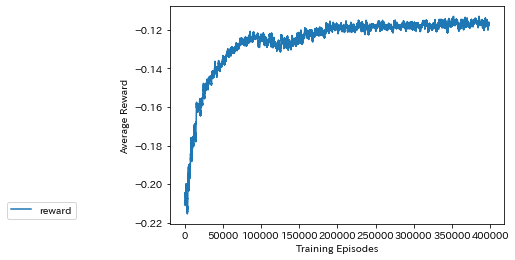

MODEL_PATH results/GR3.0/gauss2/channel02_weight000_seed00/Qnet020000.pth
test func gauss
TEST_DATASET_PATH data/GR/test/gauss/c3_dataset.npz
test func random
TEST_DATASET_PATH data/GR/test/random/c3_dataset.npz
test func smooth
TEST_DATASET_PATH data/GR/test/smooth/c3_dataset.npz
2 channel weight: =  0.05
RESULT_PATH results/GR3.0/gauss2/channel02_weight005_seed00


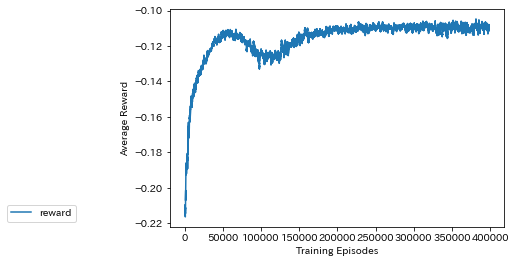

MODEL_PATH results/GR3.0/gauss2/channel02_weight005_seed00/Qnet020000.pth
test func gauss
TEST_DATASET_PATH data/GR/test/gauss/c3_dataset.npz
test func random
TEST_DATASET_PATH data/GR/test/random/c3_dataset.npz
test func smooth
TEST_DATASET_PATH data/GR/test/smooth/c3_dataset.npz


In [2]:
# 実験条件を指定
ACTIONS_TYPE = 'GR3.0'
TRAIN_TYPE = 'gauss2'
ACTIONS = ACTIONS_GR2
SEED = 0
#TR_C = 3
TST_C = 3
for setting_num in [3, 4]:
    setting = getattr(settings, f'setting{setting_num}')
    CHANNEL = setting.CHANNEL
    WEIGHT = setting.WEIGHT
    print(CHANNEL, 'channel', 'weight: = ', WEIGHT)
    RESULT_PATH = os.path.join(
        'results/%s/%s/' % (ACTIONS_TYPE, TRAIN_TYPE),
        'channel%02d_weight%03d_seed%02d' % (CHANNEL, int(100*WEIGHT), SEED)
    )
    print("RESULT_PATH", RESULT_PATH)

    # see reward
    ax = plt.subplot(111)
    ma = show_reward(ax, dir_path=RESULT_PATH, mono=False, n=1000, label='reward')
    plt.show()
    
    actions = [lambda x: x] + ACTIONS
    Qnet = QNet(c=CHANNEL, m=[20, 20, len(actions)])
    MODEL_PATH = os.path.join(RESULT_PATH, 'Qnet020000.pth')
    print('MODEL_PATH', MODEL_PATH)
    Qnet.load_state_dict(
        torch.load(MODEL_PATH)
        )
    for TEST_FUNC in ['gauss', 'random', 'smooth']:
        print('test func', TEST_FUNC)
        # load test data
        TEST_DATASET_PATH = 'data/GR/test/%s/c%d_dataset.npz' % (TEST_FUNC, TST_C)
        print("TEST_DATASET_PATH", TEST_DATASET_PATH)
        test_dataset_context = np.load(TEST_DATASET_PATH)
#         Dx = test_dataset_context['original_dataset']
#         Dy = test_dataset_context['test_dataset']
#         Dx = torch.from_numpy(Dx)
#         Dy = torch.from_numpy(Dy)

#         mse = torch.mean((Dy - Dx)**2).item()
#         print('init: ', mse)
#         result = agent_metrics(Dy.clone(), Dx, Qnet, actions, channel=CHANNEL)
#         mse = result[:, -1].mean()
#         print('mse(agent_output, x)', mse)
#         np.save(
#             os.path.join(RESULT_PATH, f'metrics({TEST_FUNC}).npy'),
#             result
#         )


2 channel weight: =  0.05
RESULT_PATH results/GR2/gauss_with_kernel4_augument/channel02_weight005_seed00


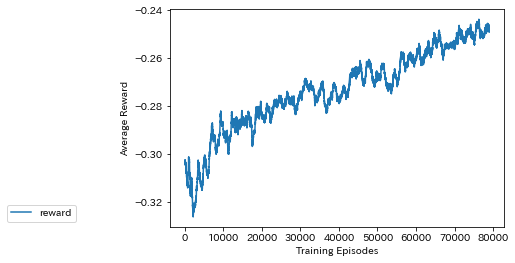

MODEL_PATH results/GR2/gauss_with_kernel4_augument/channel02_weight005_seed00/Qnet020000.pth


  0%|          | 0/10000 [00:00<?, ?it/s]

test func gauss
TEST_DATASET_PATH data/GR/test/gauss/c3_dataset.npz
init:  0.04551963881928642


  0%|          | 12/10000 [00:00<00:49, 199.97it/s]


KeyboardInterrupt: 

In [3]:
# 実験条件を指定
ACTIONS_TYPE = 'GR2'
TRAIN_TYPE = 'gauss_with_kernel4_augument'
ACTIONS = ACTIONS_GR2
SEED = 0
#TR_C = 3
TST_C = 3
for setting_num in [4]:
    setting = getattr(settings, f'setting{setting_num}')
    CHANNEL = setting.CHANNEL
    WEIGHT = setting.WEIGHT
    print(CHANNEL, 'channel', 'weight: = ', WEIGHT)
    RESULT_PATH = os.path.join(
        'results/%s/%s/' % (ACTIONS_TYPE, TRAIN_TYPE),
        'channel%02d_weight%03d_seed%02d' % (CHANNEL, int(100*WEIGHT), SEED)
    )
    print("RESULT_PATH", RESULT_PATH)

    # see reward
    ax = plt.subplot(111)
    ma = show_reward(ax, dir_path=RESULT_PATH, mono=False, n=1000, label='reward')
    plt.show()
    
    actions = [lambda x: x] + ACTIONS
    Qnet = QNet(c=CHANNEL, m=[20, 20, len(actions)])
    MODEL_PATH = os.path.join(RESULT_PATH, 'Qnet020000.pth')
    print('MODEL_PATH', MODEL_PATH)
    Qnet.load_state_dict(
        torch.load(MODEL_PATH)
        )
    for TEST_FUNC in ['gauss', 'random', 'smooth']:
        print('test func', TEST_FUNC)
        # load test data
        TEST_DATASET_PATH = 'data/GR/test/%s/c%d_dataset.npz' % (TEST_FUNC, TST_C)
        print("TEST_DATASET_PATH", TEST_DATASET_PATH)
        test_dataset_context = np.load(TEST_DATASET_PATH)
        Dx = test_dataset_context['original_dataset']
        Dy = test_dataset_context['test_dataset']
        Dx = torch.from_numpy(Dx)
        Dy = torch.from_numpy(Dy)

        mse = torch.mean((Dy - Dx)**2).item()
        print('init: ', mse)
        result = agent_metrics(Dy.clone(), Dx, Qnet, actions, channel=CHANNEL)
        mse = result[:, -1].mean()
        print('mse(agent_output, x)', mse)
        np.save(
            os.path.join(RESULT_PATH, f'metrics({TEST_FUNC}).npy'),
            result
        )


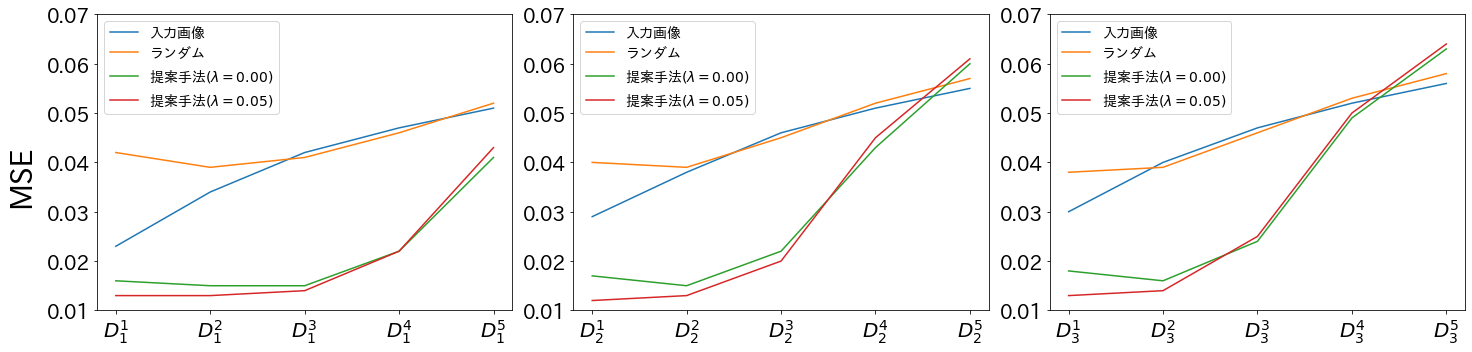

In [96]:
gauss = np.array([
    [0.023, 0.034, 0.042, 0.047, 0.051],
    [0.042, 0.039, 0.041, 0.046, 0.052],
    [0.016, 0.015, 0.015, 0.022, 0.041],
    [0.013, 0.013, 0.014, 0.022, 0.043]
])

random = np.array([
    [0.029, 0.038, 0.046, 0.051, 0.055],
    [0.040, 0.039, 0.045, 0.052, 0.057],
    [0.017, 0.015, 0.022, 0.043, 0.060],
    [0.012, 0.013, 0.020, 0.045, 0.061],
])

smooth = np.array([
    [0.030, 0.040, 0.047, 0.052, 0.056],
    [0.038, 0.039, 0.046, 0.053, 0.058],
    [0.018, 0.016, 0.024, 0.049, 0.063],
    [0.013, 0.014, 0.025, 0.050, 0.064],
])

data = [
    gauss,
    random,
    smooth
]
tick_labels = [
    ['$D_1^1$', '$D_1^2$', '$D_1^3$', '$D_1^4$', '$D_1^5$'],
    ['$D_2^1$', '$D_2^2$', '$D_2^3$', '$D_2^4$', '$D_2^5$'],
    ['$D_3^1$', '$D_3^2$', '$D_3^3$', '$D_3^4$', '$D_3^5$'],
]

labels = ['入力画像', 'ランダム', '提案手法$(\lambda = 0.00)$', '提案手法$(\lambda = 0.05)$']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
print()
for i in range(3):
    axes[i].set_ylim(0.01, 0.07)
    axes[i].set_xticks(range(5))
    axes[i].set_xticklabels(tick_labels[i])
    axes[i].tick_params(labelsize=20)
    for j in range(4):
        d = data[i][j]
        axes[i].plot(d, label=labels[j])
    axes[i].legend(loc='upper left', fontsize=14)
fig.text(-0.02, 0.5, 'MSE', va='center', rotation='vertical', fontsize=30)
plt.tight_layout()

2 channel weight: =  0.05
RESULT_PATH results/RN/train_gauss/channel02_weight005_seed00


FileNotFoundError: [Errno 2] No such file or directory: '/home/kato/workspace/selectiveSR/blur_deblur/results/RN/train_gauss/channel02_weight005_seed00/reward.pkl'

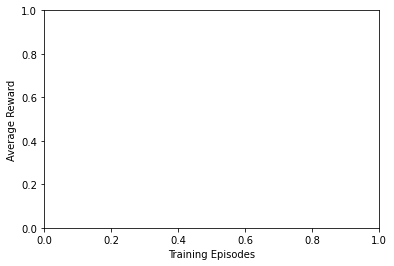

In [9]:
# 学習済みモデルに対しテスト用画像を10個作成してMSEを測定しなおす。
# テスト用のデータセットは, gauss/c3, random/c3, gauss/c5
ACTIONS_TYPE = 'RN'
SEED = 0
#TR_C = 3
TST_C = 3
for setting_num in [3, 4]:
    setting = getattr(settings, f'setting{setting_num}')
    CHANNEL = setting.CHANNEL
    WEIGHT = setting.WEIGHT
    print(CHANNEL, 'channel', 'weight: = ', WEIGHT)
    RESULT_PATH = os.path.join(
        'results/%s/train_gauss/' % (ACTIONS_TYPE,),
        'channel%02d_weight%03d_seed%02d' % (CHANNEL, int(100*WEIGHT), SEED)
    )
    print("RESULT_PATH", RESULT_PATH)

    actions = [lambda x: x] + ACTIONS_RN

    # see reward
    ax = plt.subplot(111)
    ma = show_reward(ax, dir_path=RESULT_PATH, mono=False, n=1000, label='reward')
    plt.show()

    for TEST_FUNC in ['gauss', 'random', 'smooth']:
        print('test func', TEST_FUNC)
        # load test data
        TEST_DATASET_PATH = 'data/GR/test/%s/c%d_dataset.npz' % (TEST_FUNC, TST_C)
        print("TEST_DATASET_PATH", TEST_DATASET_PATH)
        test_dataset_context = np.load(TEST_DATASET_PATH)
        originals = test_dataset_context['original_dataset']
        test_dataset = test_dataset_context['test_dataset']
        test_dataset = torch.from_numpy(test_dataset).to(torch.float32)
        originals = torch.from_numpy(originals).to(torch.float32)

        # load model
        Qnet = QNet(c=CHANNEL, m=[20, 20, len(actions)])
        MODEL_PATH = os.path.join(RESULT_PATH, 'Qnet020000.pth')
        print('MODEL_PATH', MODEL_PATH)
        Qnet.load_state_dict(
            torch.load(MODEL_PATH)
        )
        result = agent_metrics(test_dataset, originals, Qnet, actions, channel=CHANNEL)
        mse = result[:, -1].mean()
        print('MSE(test_dataset, agent_outputs) = ', mse)
        print('action frequency')
        for j in range(5):
            print(j, np.histogram(result[:, j], bins=np.arange(6) - 0.5, density=True))
        print()

        METRIC_PATH = os.path.join(RESULT_PATH, f'metrics{TEST_FUNC}_{int(1000*mse):03d}')
        print("METRIC_PATH", METRIC_PATH)
        np.save(METRIC_PATH, result)
        print('-' * 20)
        print()

# MSEはかるうう

In [19]:
labels = ['gauss', 'kernel4', 'smooth']
actions = [lambda x: x] + ACTIONS_GR2
# 結果の対象パスどこ
# setting3, setting4
seed = 0
RESULT_PATH = 'results/GR2/'
# 3種類のフィルタ
for l in range(3):
    # 回数を1~5
    for c in range(1, 6):
        # データの読み込み
        context = np.load(
            os.path.join('data/GR/test', labels[l], f'c{c}_dataset.npz')
        )
        Dy = context['test_dataset']
        Dx = context['original_dataset']
        print(Dy.shape[0])
        # 入力画像のMSE
        init_mse = np.mean((Dy - Dx)**2, axis=(1, 2))
        # ランダムに行動を選択した場合のMSE
        random_mse = []
        # random actions
        np.random.seed(seed + 100)
        aN = np.random.choice(len(actions), (Dy.shape[0], 5))
        for n in range(Dy.shape[0]):
            xn = Dx[n]
            yn = Dy[n].copy()
            an = aN[n]
            # ステップ数
            for a in an:
                yn = actions[a](yn)
            random_mse.append(
                np.mean((yn - xn)**2)
            )
        random_mse = np.array(random_mse)
        # 結果の保存
        os.makedirs(os.path.join(RESULT_PATH, 'init_random'), exist_ok=True)
        result = np.c_[init_mse, random_mse]
        print()
        print('init', init_mse.mean(), init_mse.std())
#         print('init', result[:, 0].mean(), result[:, 0].std())
#         print('random', result[:, 1].mean(), result[:, 1].std())
        print('random', random_mse.mean(), random_mse.std())
        np.save(os.path.join(RESULT_PATH, 'init_random', f'{labels[l]}_c{c}_metric.npy'), result)

10000

init 0.027687346765676954 0.006408115234040684
random 0.06602931210746353 0.047963294724595484
10000

init 0.037910874740088 0.008645544362417944
random 0.0589324297602559 0.03469201165363527
10000

init 0.04551963881928652 0.010577577580092323
random 0.05675300055544969 0.026367116690672498
10000

init 0.050661366302001486 0.012036276200349059
random 0.056928699818324546 0.021376376756672987
10000

init 0.05451609281844144 0.0131818324566733
random 0.058195074787762736 0.018796502460332733
10000

init 0.07074865559441797 0.01619272672088544
random 0.06778830946025746 0.04750106557938942
10000

init 0.052705566097818964 0.013793885577917673
random 0.0641625069351309 0.03349542281928124
10000

init 0.06552325547488658 0.01591341699056724
random 0.06585216117128966 0.025835238122188915
10000

init 0.06791535869047657 0.01735685171357603
random 0.06935131650323707 0.023314214358770284
10000

init 0.07027636312957457 0.018393127997849413
random 0.07286334722910387 0.0226353852952249

In [13]:
# Qnetでの性能を測定
labels = ['gauss', 'kernel4', 'smooth']
actions = [lambda x: x] + ACTIONS_GR2
# setting3, setting4
seed = 0
for setting_num in [3, 4]:
    setting = getattr(settings, f'setting{setting_num}')
    channel = setting.CHANNEL
    weight = setting.WEIGHT
    RESULT_PATH = os.path.join(
        'results/GR2/gauss_with_kernel4_augument',
        'channel%02d_weight%03d_seed%02d' % (channel, int(100*weight), seed)
    )
    Qnet = QNet(c=channel, m=[20, 20, len(actions)])
    MODEL_PATH = os.path.join(RESULT_PATH, 'Qnet040000.pth')
    print('MODEL_PATH', MODEL_PATH)
    Qnet.load_state_dict(
        torch.load(MODEL_PATH)
    )
    # 3種類のフィルタ
    for l in range(3):
        # 回数を1~5
        print(labels[l])
        for c in range(1, 6):
            # データの読み込み
            context = np.load(
                os.path.join('data/GR/test', labels[l], f'c{c}_dataset.npz')
            )
            Dy = torch.from_numpy(context['test_dataset'])
            Dx = torch.from_numpy(context['original_dataset'])
            # MSEの算出
            result = agent_metrics(Dy, Dx, Qnet, actions, channel=channel)
            print(f'mse = {result[:, -1].mean():.3f}+-{result[:, -1].std():.4f}')
            # 結果の保存
            os.makedirs(os.path.join(RESULT_PATH, labels[l]), exist_ok=True)
            np.save(os.path.join(RESULT_PATH, labels[l], f'c{c}_metric.npy'), result)

MODEL_PATH results/GR2/gauss_with_kernel4_augument/channel02_weight000_seed00/Qnet040000.pth
gauss


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.016+-0.0084


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.018+-0.0060


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.024+-0.0064


100%|██████████| 10000/10000 [01:17<00:00, 129.08it/s]


mse = 0.036+-0.0095


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.046+-0.0138
kernel4


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.064+-0.0171


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.060+-0.0152


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.062+-0.0137


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.065+-0.0146


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.071+-0.0164
smooth


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.017+-0.0080


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.020+-0.0058


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.027+-0.0066


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.041+-0.0115


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.050+-0.0152
MODEL_PATH results/GR2/gauss_with_kernel4_augument/channel02_weight005_seed00/Qnet040000.pth
gauss


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.016+-0.0070


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.016+-0.0060


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.019+-0.0068


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.034+-0.0110


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.045+-0.0130
kernel4


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.057+-0.0205


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.051+-0.0175


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.040+-0.0128


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.054+-0.0150


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.061+-0.0170
smooth


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.016+-0.0064


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.016+-0.0063


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.024+-0.0080


  0%|          | 0/10000 [00:00<?, ?it/s]

mse = 0.040+-0.0122


100%|██████████| 10000/10000 [01:10<00:00, 141.43it/s]

mse = 0.048+-0.0130


gauss
0.028(0.0064)	0.038(0.0086)	0.046(0.0106)	0.051(0.0120)	0.055(0.0132)	
0.066(0.0480)	0.059(0.0347)	0.057(0.0264)	0.057(0.0214)	0.058(0.0188)	
0.021(0.0101)	0.020(0.0081)	0.022(0.0063)	0.036(0.0129)	0.048(0.0172)	
0.022(0.0161)	0.020(0.0124)	0.023(0.0126)	0.036(0.0156)	0.048(0.0180)	

kernel4
0.071(0.0162)	0.053(0.0138)	0.066(0.0159)	0.068(0.0174)	0.070(0.0184)	
0.068(0.0475)	0.064(0.0335)	0.066(0.0258)	0.069(0.0233)	0.073(0.0226)	
0.064(0.0194)	0.053(0.0160)	0.046(0.0126)	0.055(0.0158)	0.064(0.0206)	
0.060(0.0161)	0.050(0.0150)	0.042(0.0153)	0.054(0.0187)	0.071(0.0252)	

smooth
0.030(0.0070)	0.040(0.0091)	0.047(0.0111)	0.052(0.0125)	0.056(0.0136)	
0.065(0.0459)	0.058(0.0325)	0.057(0.0245)	0.057(0.0201)	0.059(0.0181)	
0.022(0.0098)	0.021(0.0071)	0.026(0.0075)	0.043(0.0162)	0.052(0.0177)	
0.022(0.0158)	0.021(0.0122)	0.027(0.0132)	0.042(0.0169)	0.052(0.0185)	




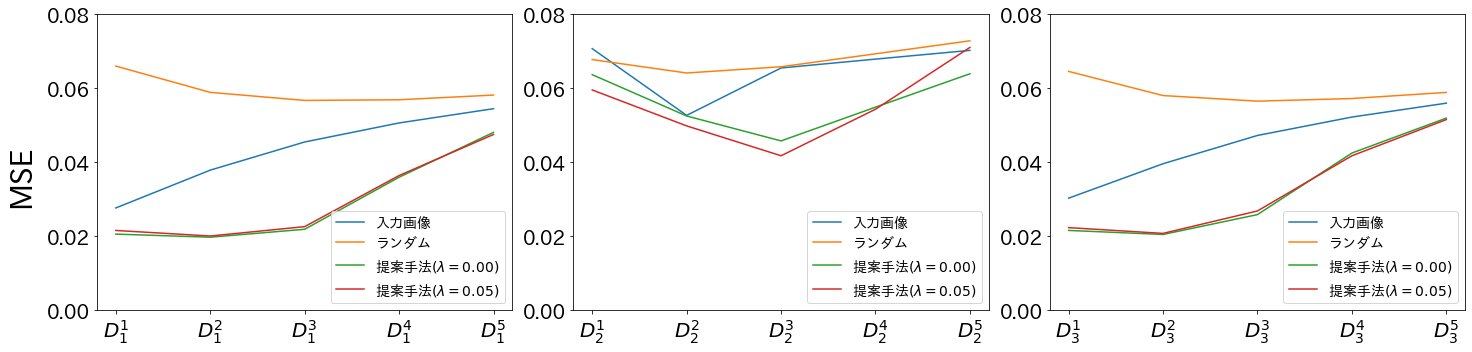

In [12]:
# 測定したMSEの可視化
base = 'results/GR2'
template_init_random = 'init_random/{label}_c{c}_metric.npy'
template_model = 'gauss_with_kernel4_augument/channel{channel:02d}_weight{weight:03d}_seed00/{label}/c{c}_metric.npy'
labels = ['gauss', 'kernel4', 'smooth']
t = 0
# 結果を表で保存
# 1次元目は、どのフィルタを用いてテストデータを作成したか
# [入力画像, ランダム, 提案手法(lambda = 0.00), 提案手法(lambda = 0.05)]で
# データセット
table = np.zeros((3, 4, 10))
for l in range(len(labels)):
    label = labels[l]
    for c in range(1, 6):
        mse_index = 2*(c-1)
        std_index = 2*(c-1) + 1
        init_random = np.load(os.path.join(base, template_init_random.format(label=label, c=c)))
        init_mse = init_random[:, 0]
        table[l, 0, mse_index] = init_mse.mean()
        table[l, 0, std_index] = init_mse.std()
        random_mse = init_random[:, 1]
        table[l, 1, mse_index] = random_mse.mean()
        table[l, 1, std_index] = random_mse.std()
        model1_mse = np.load(
            os.path.join(base, template_model.format(channel=2, weight=0, label=label, c=c))
        )[:, -1]
        table[l, 2, mse_index] = model1_mse.mean()
        table[l, 2, std_index] = model1_mse.std()
        model2_mse = np.load(
            os.path.join(base, template_model.format(channel=2, weight=5, label=label, c=c))
        )[:, -1]
        table[l, 3, mse_index] = model2_mse.mean()
        table[l, 3, std_index] = model2_mse.std()
np.save(os.path.join(base, 'metrics_table.npy'), table)

for l in range(3):
    print(labels[l])
    for m in range(4):
        for c in range(5):
            print(f'{table[l, m, 2*c]:.3f}({table[l, m, 2*c+1]:.4f})', end='\t')
        print()
    print()

tick_labels = [
    ['$D_1^1$', '$D_1^2$', '$D_1^3$', '$D_1^4$', '$D_1^5$'],
    ['$D_2^1$', '$D_2^2$', '$D_2^3$', '$D_2^4$', '$D_2^5$'],
    ['$D_3^1$', '$D_3^2$', '$D_3^3$', '$D_3^4$', '$D_3^5$'],
]

labels = ['入力画像', 'ランダム', '提案手法$(\lambda = 0.00)$', '提案手法$(\lambda = 0.05)$']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
print()
for l in range(3):
    axes[l].set_xticks(range(5))
    axes[l].set_xticklabels(tick_labels[l])
    axes[l].tick_params(labelsize=20)
    axes[l].set_ylim(0, 0.08)
    for m in range(4):
        d = table[l, m, np.arange(0, 10, 2)]  #FIXME
        axes[l].plot(d, label=labels[m])
    axes[l].legend(loc='lower right', fontsize=14)
fig.text(-0.02, 0.5, 'MSE', va='center', rotation='vertical', fontsize=30)
plt.tight_layout()

9.021204663960685


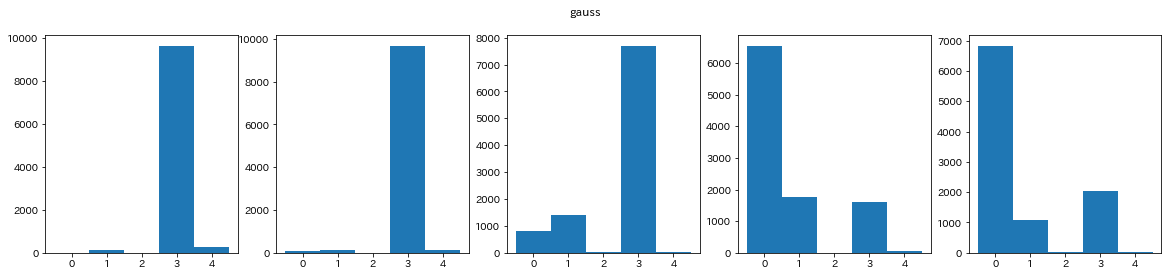

15.040694843944795


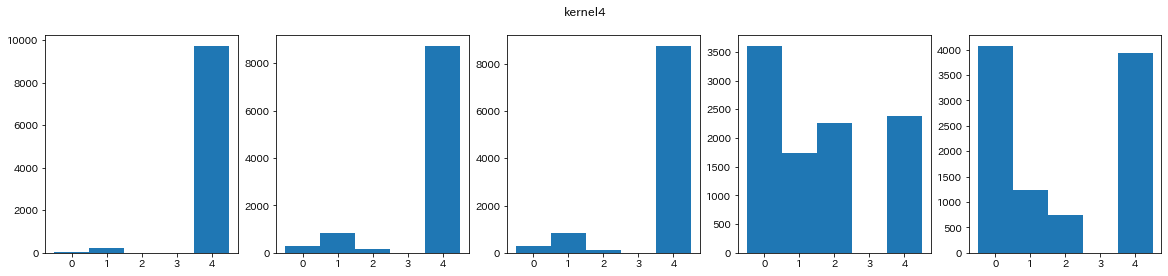

11.027872480780193


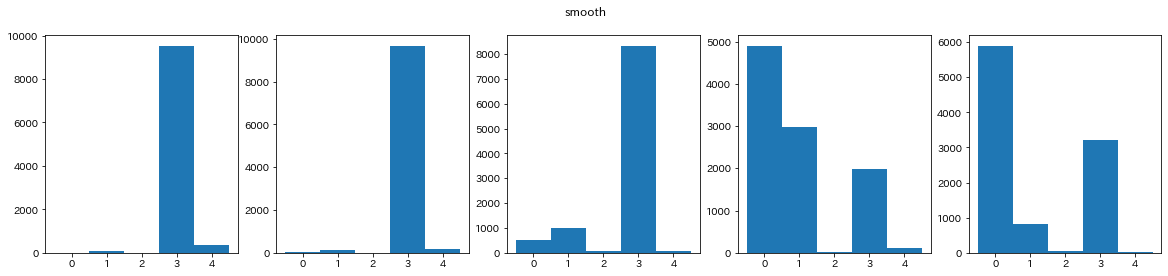

In [9]:
for label in ['gauss', 'kernel4', 'smooth']:
    result_gauss = np.load(f'results/GR2/gauss_with_kernel4/channel02_weight005_seed00/{label}/c3_metric.npy')
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle(label)
    print(np.median(result_gauss.sum(axis=1)))
    for j in range(5):
        axes[j].hist(result_gauss[:, j], bins=np.arange(6) - 0.5)
    plt.show()

In [ ]:
### 実際のデータセット中のサンプルに対してエージェントが選択する行動を見る
RESULT_PATH = os.path.join(
    'results/GR/gauss',
    'channel{channel:02d}_weight{weight:03d}_seed00'.format(channel=2, weight=5)
)
Qnet = QNet(c=2, m=[20, 20, len(actions)])
MODEL_PATH = os.path.join(RESULT_PATH, 'Qnet020000.pth')
Qnet.load_state_dict(torch.load(MODEL_PATH))

for label in ['gauss', 'random', 'smooth']:
    context = np.load(
        os.path.join('data/GR/test', labels, 'c3_dataset.npz')
    )
    Dy = torch.from_numpy(context['test_dataset'])
    Dx = torch.from_numpy(context['original_dataset'])
    for i in range(Dy.shape[0]):
        

### random x3

### smooth x3

In [19]:
# ランダムにフィルタを選択した場合の性能評価
# ガウスフィルタc3, c5の場合
outdir = 'GR/old_reward/'
FUNCS = FUNCS_GR
ACTIONS = ACTIONS_GR
actions = [lambda x:x] + ACTIONS

RESULT_PATH = Path('results/%s' % outdir)
# データ2種類
for data_file in tqdm(['gauss/c3_dataset.npz', 'gauss/c5_dataset.npz']):
    # load test data
    mse_random_means = []
    prefix = data_file.split('/')[-1].split('_')[0]
    TEST_DATASET_PATH = os.path.join('data/GR/test/', data_file)
    print("TEST_DATASET_PATH", TEST_DATASET_PATH)
    test_dataset_context = np.load(TEST_DATASET_PATH)
    Dx = test_dataset_context['original_dataset']
    Dy = test_dataset_context['test_dataset']
    # それぞれのデータセットに対し 10 回ランダムに行動を選択し直しMSEを測定
    for itr in tqdm(range(10), leave=True):
        np.random.seed(itr)
        an_N = np.random.choice(len(actions), (Dy.shape[0], 5))
        mse_random = []
        for n in range(Dy.shape[0]):
            an = an_N[n]
            xn = Dx[n]
            yn = Dy[n].copy()
            for a in an:
                yn = actions[a](yn)
            mse_random.append(
                np.mean((yn - xn)**2)
            )
        mse_random = np.array(mse_random)
        mse_random_means.append(mse_random.mean())
    mse_random_means = np.array(mse_random_means)
    print('random mse mean = ', mse_random_means.mean(), 'std', mse_random_means.std())
    np.save(str(RESULT_PATH / 'random' / (f'mse_gauss_{prefix}__over10.npy')), mse_random_means)

TEST_DATASET_PATH data/GR/test/gauss/c3_dataset.npz



random mse mean =  0.044191594525489424 std 0.00010968938818303591
TEST_DATASET_PATH data/GR/test/gauss/c5_dataset.npz



random mse mean =  0.056347134437073135 std 0.0001333709534325502



2 channel weight: =  0.05
RESULT_PATH results/GR1.6/gauss2/channel02_weight005_seed00


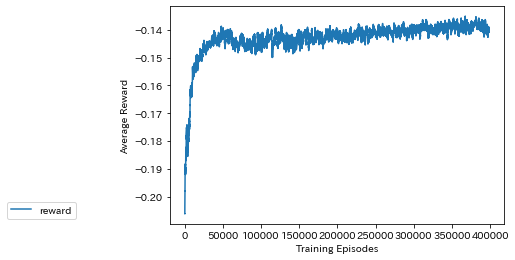

test func gauss
TEST_DATASET_PATH data/GR/test/gauss/c3_dataset.npz


  0%|          | 4/10000 [00:00<04:54, 33.96it/s]

MODEL_PATH results/GR1.6/gauss2/channel02_weight005_seed00/Qnet020000.pth


  0%|          | 0/10000 [00:00<?, ?it/s]

MSE(test_dataset, agent_outputs) =  0.2369778180588037
action frequency
0 (array([0.    , 0.    , 0.    , 0.0068, 0.9932]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
1 (array([7.000e-04, 4.000e-04, 0.000e+00, 5.704e-01, 4.285e-01]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
2 (array([0.1121, 0.2444, 0.0684, 0.5597, 0.0154]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
3 (array([0.5195, 0.3311, 0.0959, 0.0535, 0.    ]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
4 (array([0.6219, 0.2932, 0.0842, 0.0007, 0.    ]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))

METRIC_PATH results/GR1.6/gauss2/channel02_weight005_seed00/metricsgauss_236
--------------------

test func random
TEST_DATASET_PATH data/GR/test/random/c3_dataset.npz
MODEL_PATH results/GR1.6/gauss2/channel02_weight005_seed00/Qnet020000.pth


100%|██████████| 10000/10000 [04:10<00:00, 39.89it/s] 


MSE(test_dataset, agent_outputs) =  0.2383035702623427
action frequency
0 (array([0.    , 0.    , 0.    , 0.0048, 0.9952]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
1 (array([6.000e-04, 5.000e-04, 0.000e+00, 5.376e-01, 4.613e-01]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
2 (array([0.1085, 0.2499, 0.0623, 0.5672, 0.0121]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
3 (array([0.5254, 0.3196, 0.0956, 0.0594, 0.    ]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
4 (array([0.627 , 0.2885, 0.0825, 0.002 , 0.    ]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))

METRIC_PATH results/GR1.6/gauss2/channel02_weight005_seed00/metricsrandom_238
--------------------

test func smooth
TEST_DATASET_PATH data/GR/test/smooth/c3_dataset.npz


  0%|          | 4/10000 [00:00<04:49, 34.50it/s]

MODEL_PATH results/GR1.6/gauss2/channel02_weight005_seed00/Qnet020000.pth


100%|██████████| 10000/10000 [03:52<00:00, 42.97it/s]

MSE(test_dataset, agent_outputs) =  0.2341964353537187
action frequency
0 (array([0.    , 0.    , 0.    , 0.0032, 0.9968]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
1 (array([2.000e-04, 0.000e+00, 0.000e+00, 4.893e-01, 5.105e-01]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
2 (array([0.0583, 0.2057, 0.0461, 0.6496, 0.0403]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
3 (array([0.4913, 0.333 , 0.0893, 0.0864, 0.    ]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
4 (array([0.6201, 0.2969, 0.0804, 0.0026, 0.    ]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))

METRIC_PATH results/GR1.6/gauss2/channel02_weight005_seed00/metricssmooth_234
--------------------



In [102]:
# varianceを3.0にした場合の値(何故か1.6と命名している)
# 学習済みモデルの結果を確認
ACTIONS_TYPE = 'GR1.6'
SEED = 0
#TR_C = 3
TST_C = 3
for setting_num in [4]:
    setting = getattr(settings, f'setting{setting_num}')
    CHANNEL = setting.CHANNEL
    WEIGHT = setting.WEIGHT
    print(CHANNEL, 'channel', 'weight: = ', WEIGHT)
    RESULT_PATH = os.path.join(
        'results/%s/gauss2/' % (ACTIONS_TYPE,),
        'channel%02d_weight%03d_seed%02d' % (CHANNEL, int(100*WEIGHT), SEED)
    )
    print("RESULT_PATH", RESULT_PATH)

    actions = [lambda x: x] + ACTIONS_RN

    # see reward
    ax = plt.subplot(111)
    ma = show_reward(ax, dir_path=RESULT_PATH, mono=False, n=1000, label='reward')
    plt.show()

    for TEST_FUNC in ['gauss', 'random', 'smooth']:
        print('test func', TEST_FUNC)
        # load test data
        TEST_DATASET_PATH = 'data/GR/test/%s/c%d_dataset.npz' % (TEST_FUNC, TST_C)
        print("TEST_DATASET_PATH", TEST_DATASET_PATH)
        test_dataset_context = np.load(TEST_DATASET_PATH)
        originals = test_dataset_context['original_dataset']
        test_dataset = test_dataset_context['test_dataset']
        test_dataset = torch.from_numpy(test_dataset).to(torch.float32)
        originals = torch.from_numpy(originals).to(torch.float32)

        # load model
        Qnet = QNet(c=CHANNEL, m=[20, 20, len(actions)])
        MODEL_PATH = os.path.join(RESULT_PATH, 'Qnet020000.pth')
        print('MODEL_PATH', MODEL_PATH)
        Qnet.load_state_dict(
            torch.load(MODEL_PATH)
        )
        result = agent_metrics(test_dataset, originals, Qnet, actions, channel=CHANNEL)
        mse = result[:, -1].mean()
        print('MSE(test_dataset, agent_outputs) = ', mse)
        print('action frequency')
        for j in range(5):
            print(j, np.histogram(result[:, j], bins=np.arange(6) - 0.5, density=True))
        print()

        METRIC_PATH = os.path.join(RESULT_PATH, f'metrics{TEST_FUNC}_{int(1000*mse):03d}')
        print("METRIC_PATH", METRIC_PATH)
        np.save(METRIC_PATH, result)
        print('-' * 20)
        print()

In [25]:
# ランダムにフィルタを選択した場合の性能評価
# 乱数フィルタで作成したデータセットの場合
outdir = 'GR/old_reward/'
actions = [lambda x:x] + ACTIONS

RESULT_PATH = Path('results/%s' % outdir)
# データ2種類
mse_random_means = []
# さらに10種類
for i in tqdm(range(1, 11)):
    # load test data
    TEST_DATASET_PATH = f'data/GR/test/random/c3_{i}_dataset.npz'
    print("TEST_DATASET_PATH", TEST_DATASET_PATH)
    test_dataset_context = np.load(TEST_DATASET_PATH)
    Dx = test_dataset_context['original_dataset']
    Dy = test_dataset_context['test_dataset']
    # それぞれのデータセットに対し 10 回測定
    for itr in range(10):
        np.random.seed(itr)
        an_N = np.random.choice(len(actions), (Dy.shape[0], 5))
        mse_random = []
        for n in range(Dy.shape[0]):
            an = an_N[n]
            xn = Dx[n]
            yn = Dy[n].copy()
            for a in an:
                yn = actions[a](yn)
            mse_random.append(
                np.mean((yn - xn)**2)
            )
        mse_random = np.array(mse_random)
    mse_random_means.append(mse_random.mean())
mse_random_means = np.array(mse_random_means)
print('random mse mean = ', mse_random_means.mean(), 'std', mse_random_means.std())
np.save(str(RESULT_PATH / 'random' / f'mse_random_filt_over10.npy'), mse_random_means)

TEST_DATASET_PATH data/GR/test/random/c3_1_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_2_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_3_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_4_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_5_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_6_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_7_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_8_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_9_dataset.npz
TEST_DATASET_PATH data/GR/test/random/c3_10_dataset.npz

random mse mean =  0.04486956659493596 std 0.0
